# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SINASC_RO_2019.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [4]:
var = df[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]
var

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,Masculino,37 a 41 semanas,5.0
1,8.0,9.0,Feminino,37 a 41 semanas,2.0
2,8.0,10.0,Feminino,37 a 41 semanas,9.0
3,9.0,10.0,Feminino,37 a 41 semanas,5.0
4,8.0,10.0,Feminino,37 a 41 semanas,2.0
...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,2.0
27024,8.0,9.0,Masculino,37 a 41 semanas,1.0
27025,9.0,10.0,Masculino,37 a 41 semanas,2.0
27026,8.0,9.0,Masculino,32 a 36 semanas,2.0


In [6]:
#Calcular o percentual de dados faltantes no DataFrame
percentage = (var.isna().sum() / len(var)) * 100
percentage

APGAR1       0.355187
APGAR5       0.381086
SEXO         0.014799
GESTACAO     4.558236
ESTCIVMAE    1.172858
dtype: float64

In [ ]:
#Observamos que a variável com maior quantidade de dados aunsentes é a Gestação, com 4,5%, seguido de Estcivmae, com 1,17%. 
#Todos os demais possuem um percentual abaixo de 1 %. Para análise descretiva, estes dados serão retirados

In [7]:
#Retirando os dados nulos
var = var.dropna()
var.isna().sum()

APGAR1       0
APGAR5       0
SEXO         0
GESTACAO     0
ESTCIVMAE    0
dtype: int64

In [ ]:
#Convenção da variável contínua para uma variável categórica.

# Apgar1

In [79]:
var.loc[var['APGAR1'] >= 8, 'APGAR1_cat'] = 'saudável'
var.loc[(var['APGAR1'] >= 6) & (var['APGAR1'] <= 7), 'APGAR1_cat'] = 'Asfixia Leve'
var.loc[(var['APGAR1'] >= 4) & (var['APGAR1'] <= 5), 'APGAR1_cat'] = 'Asfixia Moderada'
var.loc[var['APGAR1'] <= 3, 'APGAR1_cat'] = 'Grave'
var

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,APGAR1_cat,APGAR5_cat,ESTCIVMAE_cat
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,saudável,saudável,Ignorado
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,saudável,saudável,casada
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,saudável,saudável,Ignorado
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,saudável,saudável,Ignorado
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,saudável,saudável,casada
...,...,...,...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,2.0,saudável,saudável,casada
27024,8.0,9.0,Masculino,37 a 41 semanas,1.0,saudável,saudável,solteira
27025,9.0,10.0,Masculino,37 a 41 semanas,2.0,saudável,saudável,casada
27026,8.0,9.0,Masculino,32 a 36 semanas,2.0,saudável,saudável,casada


# Apgar5

In [33]:
var.loc[var['APGAR1'] >= 8, 'APGAR1_cat'] = 'saudável'
var.loc[(var['APGAR1'] >= 6) & (var['APGAR1'] <= 7), 'APGAR1_cat'] = 'Asfixia Leve'
var.loc[(var['APGAR1'] >= 4) & (var['APGAR1'] <= 5), 'APGAR1_cat'] = 'Asfixia Moderada'
var.loc[var['APGAR1'] <= 3, 'APGAR1_cat'] = 'Grave'
var

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,APGAR1_cat,APGAR5_cat
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,saudável,saudável
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,saudável,saudável
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,saudável,saudável
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,saudável,saudável
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,saudável,saudável
...,...,...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,2.0,saudável,saudável
27024,8.0,9.0,Masculino,37 a 41 semanas,1.0,saudável,saudável
27025,9.0,10.0,Masculino,37 a 41 semanas,2.0,saudável,saudável
27026,8.0,9.0,Masculino,32 a 36 semanas,2.0,saudável,saudável


# ESTCIVMAE
Estado civil, conforme a tabela: 
1: Solteira 
2: Casada 
3: Viúva 
4: Separado judicialmente/Divorciado (SJ/D)
9: Ignorado 

In [50]:
var.loc[var['ESTCIVMAE'] == 1, 'ESTCIVMAE_cat'] = 'solteira'
var.loc[var['ESTCIVMAE'] == 2, 'ESTCIVMAE_cat'] = 'casada'
var.loc[var['ESTCIVMAE'] == 3, 'ESTCIVMAE_cat'] = 'viuva'
var.loc[var['ESTCIVMAE'] == 4, 'ESTCIVMAE_cat'] = 'sj/d'
var.loc[var['ESTCIVMAE'] == 5, 'ESTCIVMAE_cat'] = 'Ignorado'
var.loc[var['ESTCIVMAE'] == 9, 'ESTCIVMAE_cat'] = 'Ignorado'


In [53]:
ESTCIVMAE_dum = pd.get_dummies(var['ESTCIVMAE_cat'])
ESTCIVMAE_dum

,Ignorado,casada,sj/d,solteira,viuva
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
27023,0,1,0,0,0
27024,0,0,0,1,0
27025,0,1,0,0,0
27026,0,1,0,0,0


## Gráfico das variáveis quantitativas

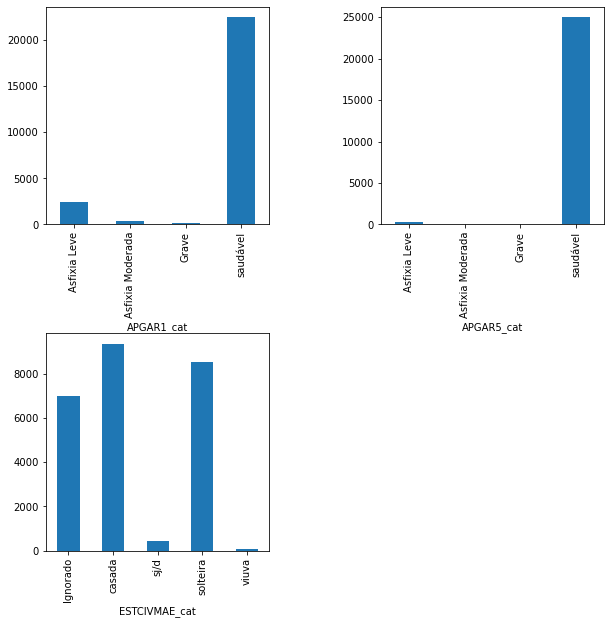

In [110]:
fig = plt.figure(figsize = (10, 10))

ax1 = fig.add_subplot(2, 2, 1) #APGAR1
ax1 = var['APGAR1_cat'].value_counts().sort_index().plot.bar(xlabel = 'APGAR1_cat')
ax2 = fig.add_subplot(2, 2, 2) #APGAR5
ax2 = var['APGAR5_cat'].value_counts().sort_index().plot.bar(xlabel = 'APGAR5_cat')
ax3 = fig.add_subplot(2, 2, 3) #ESTCIVMAE
ax3 = var['ESTCIVMAE_cat'].value_counts().sort_index().plot.bar(xlabel = 'ESTCIVMAE_cat')

plt.subplots_adjust(wspace = 0.50, hspace = 0.50)


## Gráfico das variáveis qualitativas

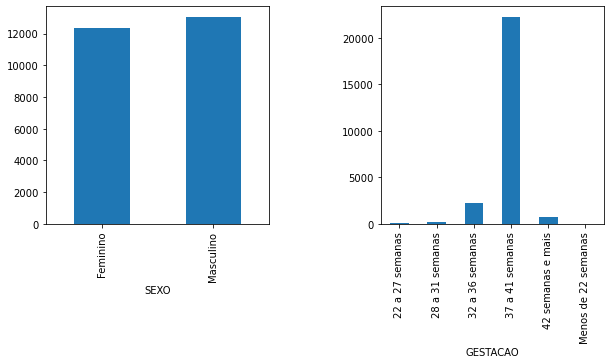

In [112]:
fig = plt.figure(figsize = (10, 10))

ax1 = fig.add_subplot(2, 2, 1) #SEXO
ax1 = var['SEXO'].value_counts().sort_index().plot.bar(xlabel = 'SEXO')
ax2 = fig.add_subplot(2, 2, 2) #GESTACAO
x2 = var['GESTACAO'].value_counts().sort_index().plot.bar(xlabel = 'GESTACAO')


plt.subplots_adjust(wspace = 0.50, hspace = 0.50)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<AxesSubplot:xlabel='CONSULTAS', ylabel='APGAR5'>

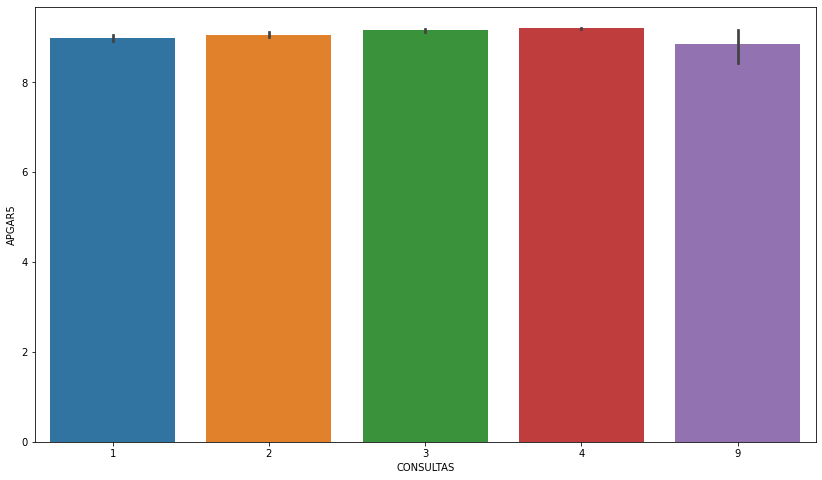

In [113]:
plt.close('all')

sns.barplot(x = 'CONSULTAS', y = 'APGAR5', data = df)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

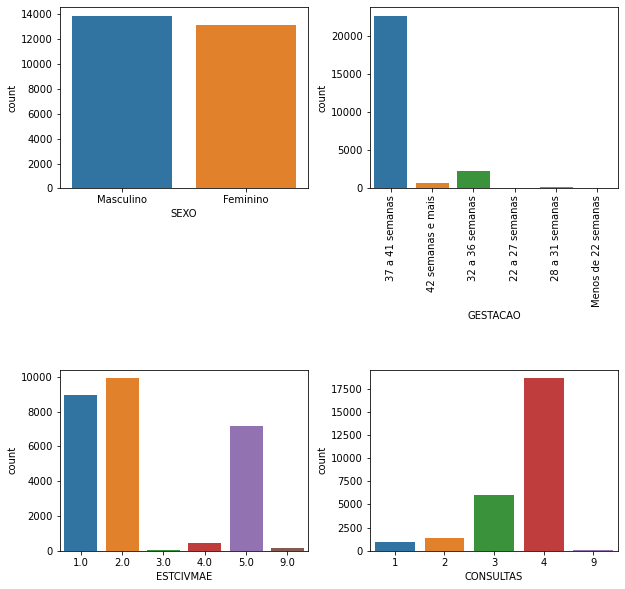

In [116]:
plt.close('all')

lista = [['SEXO', 'GESTACAO'], ['ESTCIVMAE', 'CONSULTAS']]

plt.close('all')
plt.rc('figure', figsize = (10, 10))
fig, axes = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        sns.countplot(ax = axes[i, j], x = lista[i][j], data = df)
        if i == 0 and j == 1:
            axes[i, j].tick_params(axis = 'x', rotation = 90)

plt.subplots_adjust(wspace = 0.25, hspace = 1)